In [1]:
print(1)

1


In [83]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
elo = pd.read_csv('elo.csv')
elo_dict = elo.set_index('Country').T.to_dict('list')
country1 = ''
country2 = ''
elo1 = 0
elo2 = 0

In [84]:
elo_dict

{'Brazil': [2169],
 'Argentina': [2141],
 'Spain': [2045],
 'Netherlands': [2040],
 'Belgium': [2025],
 'France': [2005],
 'Portugal': [2004],
 'Denmark': [1971],
 'Germany': [1960],
 'Uruguay': [1936],
 'Switzerland': [1929],
 'Croatia': [1922],
 'England': [1920],
 'Serbia': [1892],
 'Ecuador': [1840],
 'Mexico': [1821],
 'Iran': [1817],
 'Poland': [1809],
 'USA': [1798],
 'Japan': [1798],
 'Wales': [1790],
 'South Korea': [1783],
 'Qatar': [1780],
 'Canada': [1770],
 'Morocco': [1753],
 'Costa Rica': [1736],
 'Australia': [1719],
 'Senegal': [1687],
 'Tunisia': [1687],
 'Saudi Arabia': [1640],
 'Cameroon': [1609],
 'Ghana': [1540]}

In [129]:
results = pd.read_csv('results.csv')
#results = results.filter(items = ["home_team", "away_team", "home_score", "away_score"])
countries = ["Netherlands", "Senegal", "Ecuador", "Qatar", "England", "USA", "Iran", "Wales", 
             "Argentina", "Mexico", "Poland", "Saudi Arabia", "France", "Denmark", "Tunisia", "Australia",
            "Spain", "Germany", "Japan", "Costa Rica", "Belgium", "Croatia", "Morocco", "Canada",
            "Brazil", "Switzerland", "Serbia", "Cameroon", "Portugal", "Uruguay", "South Korea", "Ghana"]
c1 = 'Croatia'
c2 = 'Austria'
h2h = results[((results.home_team == c1) & (results.away_team == c2)) | ((results.home_team == c2) & (results.away_team == c1))]
h2h


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
23159,4/26/2000,Austria,Croatia,1.0,2.0,Friendly,Vienna,Austria,False
23956,2/28/2001,Croatia,Austria,1.0,0.0,Friendly,Rijeka,Croatia,False
28596,5/23/2006,Austria,Croatia,1.0,4.0,Friendly,Vienna,Austria,False
30610,6/8/2008,Austria,Croatia,0.0,1.0,UEFA Euro,Vienna,Austria,False
32367,5/19/2010,Austria,Croatia,0.0,1.0,Friendly,Klagenfurt,Austria,False
43675,6/3/2022,Croatia,Austria,0.0,3.0,UEFA Nations League,Osijek,Croatia,False
43998,9/25/2022,Austria,Croatia,1.0,3.0,UEFA Nations League,Vienna,Austria,False


In [130]:
matches = pd.read_csv("international_matches.csv")
matches

,date,home_team,away_team,home_team_continent,away_team_continent,home_team_fifa_rank,away_team_fifa_rank,home_team_total_fifa_points,away_team_total_fifa_points,home_team_score,...,shoot_out,home_team_result,home_team_goalkeeper_score,away_team_goalkeeper_score,home_team_mean_defense_score,home_team_mean_offense_score,home_team_mean_midfield_score,away_team_mean_defense_score,away_team_mean_offense_score,away_team_mean_midfield_score
0,1993-08-08,Bolivia,Uruguay,South America,South America,59,22,0,0,3,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1993-08-08,Brazil,Mexico,South America,North America,8,14,0,0,1,...,No,Draw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1993-08-08,Ecuador,Venezuela,South America,South America,35,94,0,0,5,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1993-08-08,Guinea,Sierra Leone,Africa,Africa,65,86,0,0,1,...,No,Win,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1993-08-08,Paraguay,Argentina,South America,South America,67,5,0,0,1,...,No,Lose,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23916,2022-06-14,Moldova,Andorra,Europe,Europe,180,153,932,1040,2,...,No,Win,65.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23917,2022-06-14,Liechtenstein,Latvia,Europe,Europe,192,135,895,1105,0,...,No,Lose,NaN,65.0,NaN,NaN,NaN,NaN,NaN,NaN
23918,2022-06-14,Chile,Ghana,South America,Africa,28,60,1526,1387,0,...,Yes,Lose,79.0,74.0,75.5,76.7,78.2,75.5,76.0,78.2
23919,2022-06-14,Japan,Tunisia,Asia,Africa,23,35,1553,1499,0,...,No,Lose,73.0,NaN,75.2,75.0,77.5,70.8,72.3,74.0


In [157]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=50, min_samples_split=10, random_state=1)
matches["target"] = (matches["home_team_result"] == "Win").astype("int")
train = matches.truncate(after=23550)
test = matches.truncate(before=23551)
predictors = ["home_team_fifa_rank", "away_team_fifa_rank", "home_team_total_fifa_points", "away_team_total_fifa_points"]
rf.fit(train[predictors], train["target"])


RandomForestClassifier(min_samples_split=10, n_estimators=50, random_state=1)

In [158]:
preds = rf.predict(test[predictors])
from sklearn.metrics import accuracy_score
error = accuracy_score(test["target"], preds)
error

0.6702702702702703

In [159]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=preds))
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,122,65
1,57,126


In [156]:
from sklearn.metrics import precision_score

precision_score(test["target"], preds)

0.5781951817068192

In [160]:
preds

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

In [148]:
def getCountry():
    return input("Enter Country: ")

In [93]:
def getElo(country):
    return elo_dict[country][0]

In [94]:
def getOdds(elo1, elo2):
    odds = 1 / (pow(10,(-(elo1-elo2)/600)) + 1)
    return odds

In [118]:
def simulate(elo1, elo2):
    prob1 = getOdds(elo1, elo2)
    rand = np.random.rand(1)
    draw_odds = 0
    if prob1 < .55:
        draw_odds = 1.35
    elif prob1 < .6:
        draw_odds = 1.31
    elif prob1 < .65:
        draw_odds = 1.27
    elif prob1 < .7:
        draw_odds = 1.23
    elif prob1 < .75:
        draw_odds = 1.21
    elif prob1 < .8:
        draw_odds = 1.17
    elif prob1 < .85:
        draw_odds = 1.13
    elif prob1 < .9:
        draw_odds = 1.09
    else:
        draw_odds = 1.05
    if rand < draw_odds*prob1 and rand > (2-draw_odds)*prob1:
        return .5
    elif rand < prob1:
        return 1
    else:
        return 0


In [119]:

def monte_carlo(n):
    results = 0
    c1 = 0
    c2 = 0
    tie = 0
    for i in range(n):
        match_result = simulate(elo1,elo2)
        
            
        if match_result == .5:
            tie = tie + 1
        elif match_result == 1:
            c1 = c1 + 1
        else:
            c2 = c2 + 1
            
        results = results + match_result
        
        prob_value = results/(i+1)
        list1.append(prob_value)
        plt.axhline(y=getOdds(elo1,elo2), color='r', linestyle='-')
        plt.xlabel("Iterations")
        plt.ylabel("Probability")
        plt.plot(list1)

    print(f"{country1} Win: {c1/(n/100)}%\n{country2} Win: {c2/(n/100)}%\nDraw: {tie/(n/100)}%")
    return results/n

Enter Country: Brazil
Enter Country: Saudi Arabia
Brazil Win: 79.4%
Saudi Arabia Win: 3.5%
Draw: 17.1%


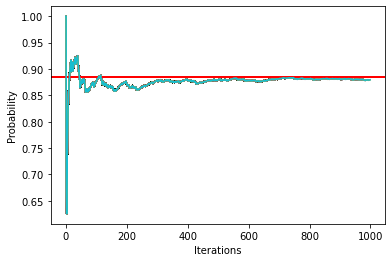

In [120]:
list1 = []  
country1 = getCountry()
country2 = getCountry()
elo1 = getElo(country1)
elo2 = getElo(country2)
answer = monte_carlo(1000)

